## 蒙特卡洛模拟：内生性会造成回归系数的巨大误差

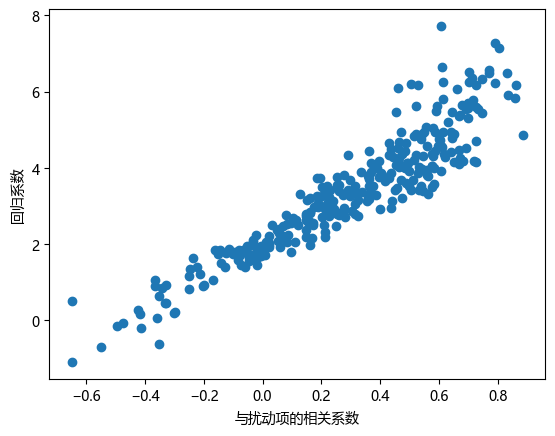

In [55]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Microsoft YaHei' 

K = []
C = []
times = 300
for time in range(0,times):
    n = 10
    x1 = np.random.uniform(-10, 10, n).reshape(n,1)
    u1 = (np.random.normal(0, 5, n) - np.random.uniform(0, 1, n)).reshape(n,1) #生成临时随机数，为下一行做准备
    x2 = 0.3*x1 + u1 #x2和x1的相关性不确定，因为我们设定了x2要加上u1这个随机数
    u = np.random.normal(0,1,n).reshape(n,1)
    y = 0.5 + 2*x1 + 5*x2 +u
    model = LinearRegression()
    # 使用训练数据拟合模型
    model.fit(x1, y)
    u = x2 + u
    c = np.corrcoef(x1 , u , rowvar=False)[0, 1]
    K.append(model.coef_)
    C.append(c)


plt.scatter(C,K)
plt.xlabel("与扰动项的相关系数")
plt.ylabel("回归系数")
plt.show()